<a href="https://colab.research.google.com/github/AlexNedyalkov/Linear-Algebra-Python/blob/master/Projections_and_Orthogonalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D

---
# Theory
---


*   __Orthogonal matrices__: all columns are pairwise orthogonal and have a magnitude of 1

*   Q.transpose() @ Q = I __AND__ Q^-1 @ Q = I ==> Q.transpose() == Q^-1



---
# 1: Projections in R^2
---


In [ ]:
# point b
b = np.array([4,1])

# line a
a = np.array([ 2, 5 ])

# orthogonal line from b to a is the difference of two vectors
orthogonal_side = b - beta * a
# since orthogonal side and beta * a are perpendicular:
# dot product of orhogoanl side and a is zero
# (a.transpose()) @ orthogonal_sde = 0
# (a.transpose()) @ (b - beta * a) = 0
# (a.transpose() @ b - beta(a.transpose() @ a) = 0
# (a.transpose() @ b) = beta*(a.tranpose() @ a)
# a.tranpose @ a is a number therefore:
# beta - scaler on which you would project b on a
beta = a.transpose() @ b / (a.transpose() @ a)

beta

0.4482758620689655

In [ ]:
# the point on a where b would project
a * beta

array([0.89655172, 2.24137931])

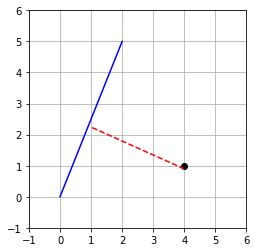

In [ ]:
# draw!
# plot point b
plt.plot(b[0],b[1],'ko',label='b')
# plot vector a
plt.plot([0, a[0]], [0, a[1]], 'b', label = 'a')

#plot the projections
plt.plot([b[0], b[1]], [beta*a[0], beta * a[1]], 'r--', label = 'b-$\beta$a')

# add graphics
plt.axis('square')
plt.grid()
plt.axis((-1, 6, -1, 6))

plt.show()


---
# 2: Projections in R^N
---


In [ ]:
# you have a vector in m dimensional space and you want to project it on A
# orthogonal line from b to A is the difference of two vectors
orthogonal_side = b - A * beta
# orthogonal side dot the A is zero:
# A.transpose() @ (b - A * beta) = 0
# A.transpose() @ b - A.transpose() @ A @ beta = 0
# A.transpose() @ b = A.transpose() @ A @ beta
# (A.transpose @ A)^-1 @ A.transpose() @ b = beta
# beta = A^-1 @ A.transpose()^-1 @ A.tranpose() @ b 
# beta = A^-1 @ b 

# sizes
m = 16
n = 10

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)

In [ ]:
# b - A * x = 

In [ ]:


# solution using explicit inverse
x1 = np.linalg.inv(np.matrix.transpose(A)@A) @ (np.matrix.transpose(A)@b)

# python solution
x2 = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)

# show that the results are the same
print([x1,x2])

[[-0.4750391 ]
 [-0.10783984]
 [-0.69850841]]
[[-0.40323859]
 [-0.26219663]
 [-0.68160854]]


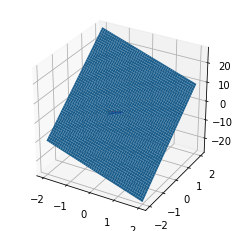

In [ ]:
## geometric perspective in R^3

# matrix sizes
m = 3
n = 2

# vector b
b = np.random.randn(m,1)

# matrix A
A = np.random.randn(m,n)


# solution
x = np.linalg.solve(np.matrix.transpose(A)@A,np.matrix.transpose(A)@b)
Ax = A@x

print(b)
print(Ax)

## plot
fig = plt.figure(figsize=plt.figaspect(1))
ax = fig.gca(projection='3d')

# plot the vectors
ax.plot([0, b[0]],[0, b[1]],[0, b[2]],'r')
ax.plot([0, Ax[0]],[0, Ax[1]],[0, Ax[2]],'b')

# plot the projection line
ax.plot( [Ax[0][0], b[0]],
         [Ax[1][0], b[1]],
         [Ax[2][0], b[2]], 'g')

# now draw plane
xx, yy = np.meshgrid(np.linspace(-2,2), np.linspace(-2,2))
cp = np.cross(A[:,0],A[:,1])
z1 = (-cp[0]*xx - cp[1]*yy)*1./cp[2]
ax.plot_surface(xx,yy,z1)

plt.show()

---
#Code Challenge: Decompose vectors to orthogonal componenta
---

In [ ]:
# vector v to be decomposed
w = np.array([2,3])

# vector v to be used as reference
v = np.array([4, 0])
v

array([4, 0])

In [ ]:
# compute w parallel to v
w_paralel = (w.transpose() @ v)/(v.transpose() @ v) * v

w_paralel

array([2., 0.])

In [ ]:
# compute v orthogonal
w_orthogonal = w - w_paralel
w_orthogonal

array([0., 3.])

In [ ]:
# check with dot product
w_orthogonal @ w_paralel

0.0

In [ ]:
# check by adding the two components together
w_orthogonal + w_paralel

array([2., 3.])

---
#3: Orthogonal Matrices
---

In [ ]:
s = np.array([[2, 1],[-2, 2],[1, 2]])/3
s

array([[ 0.66666667,  0.33333333],
       [-0.66666667,  0.66666667],
       [ 0.33333333,  0.66666667]])

In [ ]:
first_column = s[:,0]
second_column = s[:,1]

In [ ]:
first_column @ second_column

0.0

In [ ]:
np.linalg.norm(first_column)

1.0

In [ ]:
np.linalg.norm(second_column)

1.0

In [ ]:
# Identity matrix
s.transpose() @ s

array([[1.00000000e+00, 1.54197642e-17],
       [1.54197642e-17, 1.00000000e+00]])

In [ ]:
# Nonidentity matrix
s @ s.transpose()

array([[ 0.55555556, -0.22222222,  0.44444444],
       [-0.22222222,  0.88888889,  0.22222222],
       [ 0.44444444,  0.22222222,  0.55555556]])

---
#4: Gram-Schmidt
---


In [ ]:
A = np.array([[1, 1, -2], [3, -1, 1]])
A

array([[ 1,  1, -2],
       [ 3, -1,  1]])

In [ ]:
#Get each column
first_column = (A[:, 0] ).transpose()
print(first_column)

second_column = A[:, 1].transpose()
print(second_column)

third_column = A[:, 2].transpose()
print(third_column)

[1 3]
[ 1 -1]
[-2  1]


In [ ]:
parallel_second = (first_column.transpose() @ second_column) / (first_column @ first_column.transpose()) * first_column

In [ ]:
orthogonal_second = second_column - parallel_second
orthogonal_second

array([ 1.2, -0.4])

In [ ]:
# check
orthogonal_second @ first_column

2.220446049250313e-16

In [ ]:
parallel_third = (first_column @ third_column / first_column @ first_column) * (first_column)

In [ ]:
orthogonal_third = third_column - parallel_third
orthogonal_third

array([-4., -5.])

In [ ]:
# check
orthogonal_third @ first_column

-19.0


---
# 4: QR decomposition
---


In [ ]:
# example from the slides

A = [ [1,0],
      [1,0],
      [0,1] ]
  
# "full" QR decomposition
Q,R = np.linalg.qr(A,'complete')
print(Q)

# "economy" QR decompmosition
Q,R = np.linalg.qr(A) # is the default option in Python
print(Q)

In [ ]:
## another example

# the to-be-decomposed matrix
M = np.array( [ [1, 1,-2], [3,-1, 1] ] )

# QR decomposition
Q,R = np.linalg.qr(M,'complete')

# notice:
print('R from QR: '),print(R)
print('R from Q^TA: '),print(Q.T@M)

# plot
colorz = 'krg'

for i in range(0,np.shape(M)[1]):
    
    # plot original vector M
    plt.plot([0,M[0,i]],[0,M[1,i]],colorz[i])
    
    # plot orthogonalized vector Q
    if i<np.shape(Q)[1]:
        plt.plot([0,Q[0,i]],[0,Q[1,i]],colorz[i],linestyle='--')
    
    # plot residual vector R
    plt.plot([0,R[0,i]],[0,R[1,i]],colorz[i],linestyle=':')

    
plt.legend(['M_1','Q_1','R_1'])
plt.axis('square')
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.grid(True)
plt.plot()
